In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import os
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [12]:
train_data = pd.read_csv('./Training.csv')
train_data = np.array(train_data)
train_labels = train_data[:,1]
train_features = train_data[:,2:]

test_data = pd.read_csv('./Test.csv')
test_data = np.array(test_data)
test_labels = test_data[:,1]
test_features = test_data[:,2:]

In [13]:
min_samples_leaves = [1,2,5,8,10,12,15,20,25,50]
max_depths = [1,2,3,4,5,6,7,8,9,10]
cross_val = 10

In [14]:
parameters = {'min_samples_leaf':min_samples_leaves, 'max_depth':max_depths}
clfdt = GridSearchCV(DecisionTreeClassifier(), parameters, cv = cross_val)
clfdt.fit(train_features, train_labels)

#PART A
print(clfdt.best_params_)
pred = clfdt.predict(train_features)
print("Train Accuracy = ", accuracy_score(pred, train_labels))
pred = clfdt.predict(test_features)
print("Test Accuracy = ", accuracy_score(pred, test_labels))

{'max_depth': 5, 'min_samples_leaf': 8}
Train Accuracy =  0.822
Test Accuracy =  0.696


In [22]:
parameters = {'min_samples_leaf':min_samples_leaves, 'max_depth':max_depths}
clfrf = GridSearchCV(RandomForestClassifier(), parameters, cv = cross_val)
clfrf.fit(train_features, train_labels)

#PART A
print(clfrf.best_params_)
pred = clfrf.predict(train_features)
print("Train Accuracy = ", accuracy_score(pred, train_labels))
pred = clfrf.predict(test_features)
print("Test Accuracy = ", accuracy_score(pred, test_labels))

{'max_depth': 9, 'min_samples_leaf': 10}
Train Accuracy =  0.812
Test Accuracy =  0.732


In [23]:
#PART B
scores = clfdt.cv_results_['mean_test_score']
scores = np.reshape(scores, (10,10))
print(scores)
indxdt = np.argmax(scores)//10
indydt = np.argmax(scores)%10
print('max x index: ', indxdt)
print('max y index: ', indydt)
print('min_samples_leaf: ', min_samples_leaves[indydt])
print('max_depth : ', max_depths[indxdt])

[[0.714 0.714 0.714 0.714 0.714 0.714 0.714 0.714 0.714 0.714]
 [0.718 0.718 0.718 0.718 0.718 0.718 0.718 0.718 0.718 0.722]
 [0.728 0.732 0.734 0.734 0.73  0.73  0.736 0.746 0.734 0.736]
 [0.75  0.74  0.75  0.74  0.734 0.734 0.736 0.74  0.732 0.736]
 [0.734 0.73  0.734 0.754 0.744 0.73  0.736 0.746 0.736 0.736]
 [0.738 0.738 0.74  0.754 0.73  0.724 0.726 0.736 0.736 0.736]
 [0.72  0.718 0.71  0.742 0.738 0.724 0.724 0.726 0.734 0.736]
 [0.702 0.69  0.718 0.728 0.732 0.724 0.724 0.73  0.736 0.736]
 [0.702 0.688 0.708 0.744 0.734 0.718 0.724 0.726 0.734 0.736]
 [0.7   0.678 0.71  0.742 0.734 0.72  0.724 0.73  0.734 0.736]]
max x index:  4
max y index:  3
min_samples_leaf:  8
max_depth :  5


In [25]:
#PART B
scores = clfrf.cv_results_['mean_test_score']
scores = np.reshape(scores, (10,10))
print(scores)
indxrf = np.argmax(scores)//10
indyrf = np.argmax(scores)%10
print('max x index: ', indxrf)
print('max y index: ', indyrf)
print('min_samples_leaf: ', min_samples_leaves[indyrf])
print('max_depth : ', max_depths[indxrf])

[[0.712 0.712 0.712 0.714 0.718 0.714 0.714 0.714 0.714 0.714]
 [0.72  0.726 0.72  0.728 0.714 0.716 0.716 0.718 0.718 0.714]
 [0.754 0.734 0.74  0.736 0.732 0.746 0.728 0.712 0.716 0.716]
 [0.742 0.746 0.744 0.758 0.73  0.728 0.728 0.752 0.728 0.714]
 [0.758 0.76  0.758 0.75  0.754 0.762 0.764 0.724 0.736 0.714]
 [0.732 0.76  0.758 0.762 0.76  0.748 0.758 0.746 0.724 0.716]
 [0.738 0.756 0.76  0.758 0.752 0.744 0.746 0.736 0.73  0.714]
 [0.756 0.756 0.756 0.746 0.754 0.764 0.746 0.738 0.73  0.714]
 [0.742 0.766 0.768 0.746 0.774 0.75  0.748 0.754 0.726 0.714]
 [0.73  0.744 0.762 0.748 0.748 0.75  0.75  0.75  0.726 0.714]]
max x index:  8
max y index:  4
min_samples_leaf:  10
max_depth :  9


In [26]:
pred1_train_leaf = []
pred1_test_leaf = []
pred1_train_depth = []
pred1_test_depth = []

pred2_train_leaf = []
pred2_test_leaf = []
pred2_train_depth = []
pred2_test_depth = []

In [27]:
#CHANGE min_samples_leaf PARAMETER - DECISION TREE
for i in min_samples_leaves:
    #print(i)
    clf1 = DecisionTreeClassifier(min_samples_leaf=i)
    clf1.fit(train_features, train_labels)

    pred_te = clf1.predict(test_features)
    acc = accuracy_score(pred_te, test_labels)
    pred1_test_leaf.append(acc)
    #print(acc)

    pred_tr = clf1.predict(train_features)
    acc = accuracy_score(pred_tr, train_labels)
    pred1_train_leaf.append(acc)
    #print(acc)

In [28]:
#CHANGE max_depth PARAMETER - DECISION TREE
for i in max_depths:
    #print(i)
    clf2 = DecisionTreeClassifier(max_depth=i)
    clf2.fit(train_features, train_labels)

    pred_te = clf2.predict(test_features)
    acc = accuracy_score(pred_te, test_labels)
    pred1_test_depth.append(acc)
    #print(acc)

    pred_tr = clf2.predict(train_features)
    acc = accuracy_score(pred_tr, train_labels)
    pred1_train_depth.append(acc)
    #print(acc)

In [29]:
#CHANGE min_samples_leaf PARAMETER - RANDOM FOREST
for i in min_samples_leaves:
    #print(i)
    clf3 = RandomForestClassifier(min_samples_leaf=i)
    clf3.fit(train_features, train_labels)

    pred_te = clf3.predict(test_features)
    acc = accuracy_score(pred_te, test_labels)
    pred2_test_leaf.append(acc)
    #print(acc)

    pred_tr = clf3.predict(train_features)
    acc = accuracy_score(pred_tr, train_labels)
    pred2_train_leaf.append(acc)
    #print(acc)

In [30]:
#CHANGE max_depth PARAMETER - RANDOM FOREST
for i in max_depths:
    #print(i)
    clf4 = RandomForestClassifier(max_depth=i)
    clf4.fit(train_features, train_labels)

    pred_te = clf4.predict(test_features)
    acc = accuracy_score(pred_te, test_labels)
    pred2_test_depth.append(acc)
    #print(acc)

    pred_tr = clf4.predict(train_features)
    acc = accuracy_score(pred_tr, train_labels)
    pred2_train_depth.append(acc)
    #print(acc)

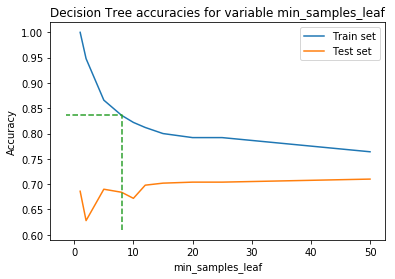

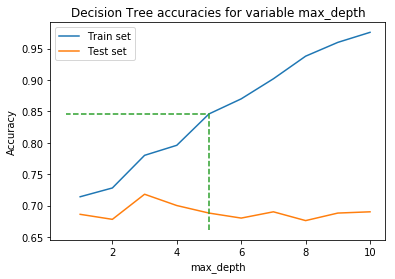

In [31]:
plt.figure()
plt.title('Decision Tree accuracies for variable min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.plot(min_samples_leaves, pred1_train_leaf, label='Train set')
plt.plot(min_samples_leaves, pred1_test_leaf, label='Test set')
xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([min_samples_leaves[indydt], min_samples_leaves[indydt], xlim[0]], [ylim[0], pred1_train_leaf[indydt], pred1_train_leaf[indydt]], linestyle="--")
plt.legend()

plt.figure()
plt.title('Decision Tree accuracies for variable max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.plot(max_depths, pred1_train_depth, label='Train set')
plt.plot(max_depths, pred1_test_depth, label='Test set')
xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([max_depths[indxdt], max_depths[indxdt], xlim[0]], [ylim[0], pred1_train_depth[indxdt], pred1_train_depth[indxdt]], linestyle="--")
plt.legend()

plt.show()

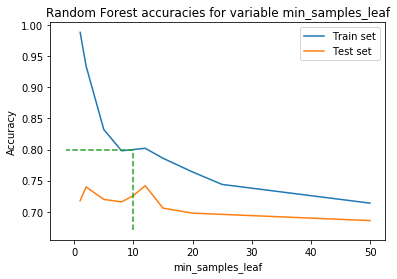

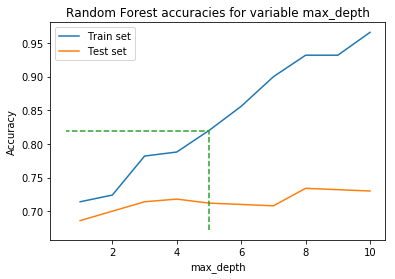

In [32]:
plt.figure()
plt.title('Random Forest accuracies for variable min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.plot(min_samples_leaves, pred2_train_leaf, label='Train set')
plt.plot(min_samples_leaves, pred2_test_leaf, label='Test set')
xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([min_samples_leaves[indyrf], min_samples_leaves[indyrf], xlim[0]], [ylim[0], pred2_train_leaf[indyrf], pred2_train_leaf[indyrf]], linestyle="--")
plt.legend()

plt.figure()
plt.title('Random Forest accuracies for variable max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.plot(max_depths, pred2_train_depth, label='Train set')
plt.plot(max_depths, pred2_test_depth, label='Test set')
xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([max_depths[indyrf], max_depths[indyrf], xlim[0]], [ylim[0], pred2_train_depth[indyrf], pred2_train_depth[indyrf]], linestyle="--")
plt.legend()

plt.show()

In [33]:
#PART C
#Code reference https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

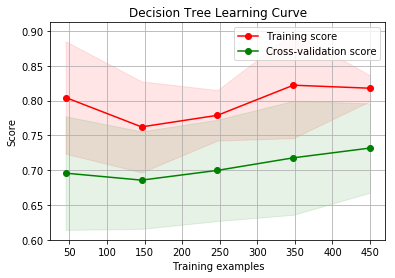

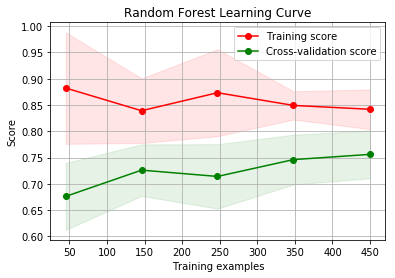

In [34]:
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
plot_learning_curve(clfdt, "Decision Tree Learning Curve", train_features, train_labels, cv=cv, n_jobs=4)

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
plot_learning_curve(clfrf, "Random Forest Learning Curve", train_features, train_labels, cv=cv, n_jobs=4)
#DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 8)
#RandomForestClassifier(max_depth = 10, min_samples_leaf = 5)
plt.show()

<module 'matplotlib.pyplot' from 'c:\\users\\surabhi\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

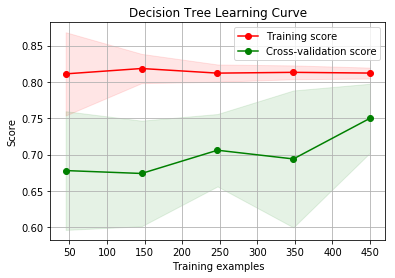

In [40]:
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
plot_learning_curve(DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 8), "Decision Tree Learning Curve", train_features, train_labels, cv=cv, n_jobs=4)

In [36]:
#PART D
valdt = []
for i in range(cross_val):
    string = "split"+str(i)+"_test_score"
    mat = clfdt.cv_results_[string]
    mat = np.reshape(mat,(10,10))
    valdt.append(mat[indxdt,indydt])

In [37]:
#PART D
valrf = []
for i in range(cross_val):
    string = "split"+str(i)+"_test_score"
    mat = clfrf.cv_results_[string]
    mat = np.reshape(mat,(10,10))
    valrf.append(mat[indxdt,indydt])

Text(0,0.5,'Error')

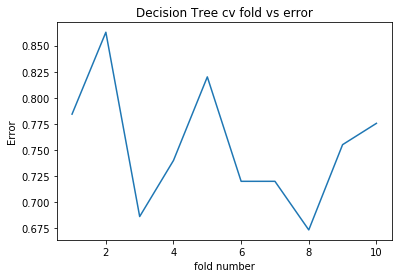

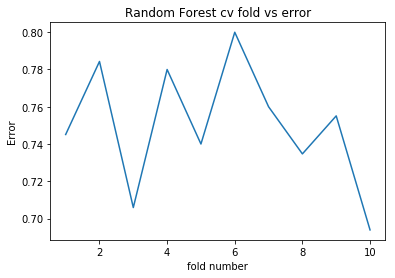

In [38]:
#PART D
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,10], valdt)
plt.title('Decision Tree cv fold vs error')
plt.xlabel('fold number')
plt.ylabel('Error')
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,10], valrf)
plt.title('Random Forest cv fold vs error')
plt.xlabel('fold number')
plt.ylabel('Error')

In [39]:
#PART D
print("Varience of error in all folds for Decision Tree = ", np.var(valdt))
print("Varience of error in all folds for Random Forest = ", np.var(valrf))

Varience of error in all folds for Decision Tree =  0.0031143574965000016
Varience of error in all folds for Random Forest =  0.001015775865528284


In [41]:
#PART E
f = open('clfdt.pkl', 'wb')
pickle.dump(clfdt, f)
f.close()
f = open('clfrf.pkl', 'wb')
pickle.dump(clfrf, f)
f.close()